In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('F:/KERAS_EJEMPLOS/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [5]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [6]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
 - 0s - loss: 55825.3171
Epoch 2/400
 - 0s - loss: 35424.1396
Epoch 3/400
 - 0s - loss: 22839.7192
Epoch 4/400
 - 0s - loss: 12163.5989
Epoch 5/400
 - 0s - loss: 5313.5754
Epoch 6/400
 - 0s - loss: 2141.4243
Epoch 7/400
 - 0s - loss: 1236.3557
Epoch 8/400
 - 0s - loss: 1094.8380
Epoch 9/400
 - 0s - loss: 1072.3972
Epoch 10/400
 - 0s - loss: 1063.1745
Epoch 11/400
 - 0s - loss: 1049.3563
Epoch 12/400
 - 0s - loss: 1057.6625
Epoch 13/400
 - 0s - loss: 1052.6197
Epoch 14/400
 - 0s - loss: 1047.1822
Epoch 15/400
 - 0s - loss: 1045.6036
Epoch 16/400
 - 0s - loss: 1037.5477
Epoch 17/400
 - 0s - loss: 1044.6893
Epoch 18/400
 - 0s - loss: 1042.3217
Epoch 19/400
 - 0s - loss: 1078.3362
Epoch 20/400
 - 0s - loss: 1046.9661
Epoch 21/400
 - 0s - loss: 1031.5437
Epoch 22/400
 - 0s - loss: 1044.8751
Epoch 23/400
 - 0s - loss: 1059.2126
Epoch 24/400
 - 0s - loss: 1018.5951
Epoch 25/400
 - 0s - loss: 1012.3366
Epoch 26/400
 - 0s - loss: 1017.1792
Epoch 27/400
 - 0s - loss: 994.6457
Epoch 2

In [7]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 564.74 MSE (23.76 RMSE)
Test Score: 2247.19 MSE (47.40 RMSE)


In [8]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [9]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [10]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

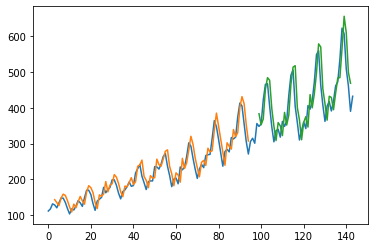

In [11]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()